<a href="https://colab.research.google.com/github/Namtk214/AIO-Homework/blob/main/sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1QLxsbVKswjU48XeAXcr4Fei3eE6rNvfG

Downloading...
From: https://drive.google.com/uc?id=1QLxsbVKswjU48XeAXcr4Fei3eE6rNvfG
To: /content/SalesPrediction.csv
100% 206k/206k [00:00<00:00, 59.9MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [4]:
def r2score ( y_pred , y ):
  rss = np . sum (( y_pred - y ) ** 2)
  tss = np . sum (( y - y_pred . mean () ) ** 2)
  r2 = 1 - ( rss / tss )
  return r2

In [5]:
y_pred = np . array ([1 , 2 , 3 , 4 , 5])
y = np . array ([1 , 2 , 3 , 4 , 5])

r2score ( y_pred , y )

1.0

In [6]:
y_pred = np . array ([1 , 2 , 3 , 4 , 5])
y = np . array ([3 , 5 , 5 , 2 , 4])
r2score ( y_pred , y )

-1.2000000000000002

In [7]:
X_new = X
degree = 1
for d in range (2 , degree +1) :
 X_new = np . c_ [ X_new , np . power (X , d ) ]

NameError: name 'X' is not defined

SALES PREDICTION

In [8]:
df = pd.read_csv('/content/SalesPrediction.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [15]:
df.corr()
#

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866885,0.527010,0.996652,0.021335,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,0.009518,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.011631,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,0.019267,-0.011701,-0.004099,-0.003289
Influencer_Macro,0.021335,0.009518,0.011631,0.019267,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.011701,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.328482,-0.335465,-0.334495,1.000000


<Axes: >

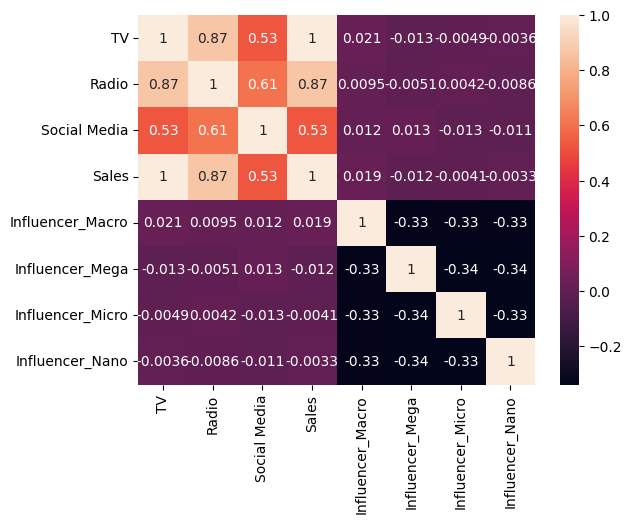

In [16]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [9]:
df = pd.get_dummies(df)
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


In [ ]:
df = df.fillna(0)
df = df.fillna(df.mean())

In [44]:
# Handle Null values
df = df.fillna (df.mean())
# Get features
# X = df[df.columns].drop('Sales', axis=1)
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro','Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]
# Get target
y = df[['Sales']]

In [45]:
X.shape, y.shape

((4572, 7), (4572, 1))

In [11]:
from sklearn . model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (
X ,
y ,
test_size =0.33 ,
random_state =0
)

In [46]:
X_train.shape, X_test.shape

((3063, 7), (1509, 7))

In [47]:
from sklearn . preprocessing import StandardScaler
scaler = StandardScaler ()
X_train_processed = scaler.fit_transform ( X_train )
scaler . mean_ [0]
X_test_processed = scaler.transform ( X_test )

In [48]:
scaler.scale_

array([26.0602579 ,  9.62806595,  2.21765947,  0.43173288,  0.43381083,
        0.43305981,  0.43343598])

In [49]:
from sklearn . preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree =2)
X_train_poly = poly_features.fit_transform ( X_train_processed )
X_test_poly = poly_features.transform ( X_test_processed )

In [50]:
X_train_processed.shape

(3063, 7)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
poly_model = LinearRegression ()
poly_model.fit( X_train_poly , y_train )
preds = poly_model.predict ( X_test_poly )
r2_score ( y_test , preds )

0.9951796158547627

In [55]:

class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=1000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones(self.num_samples), X_data]
        self.y_target = y_target
        self.y_target = y_target.values.reshape(-1, 1)
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # Initial weight
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        return np.mean((y_pred - y_target) ** 2)

    def predict(self, X_data):
        # return X_data.dot(self.theta)
        try:
            y_pred = X_data.dot(self.theta)
        except:
            X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
            y_pred = X_data.dot(self.theta)
        return y_pred


    def fit(self):
      # for epochs in range(self.iterations):
      #   y_pred = self.predict(self.X_data)
      #   loss = self.compute_loss(y_pred, self.y_target)
      #   gradient = (1/self.num_samples) * self.X_data.T.dot(y_pred - self.y_target)
      #   self.theta -= self.learning_rate * gradient
      #   self.losses.append(loss)
      #   if epochs % 50 == 0:
      #     print(f'Epochs: {epochs}, Loss: {loss}')
      # return {
      #     'loss': sum(self.losses) / len(self.losses),
      #     'weight': self.theta
      # }
      for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            loss_grd = 2*(y_pred-self.y_target)/self.num_samples
            gradients = self.X_data.T.dot(loss_grd)

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')

      return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }


In [56]:
linear_model = CustomLinearRegression(X_train_processed, y_train, learning_rate=0.1, num_epochs=250)
linear_model.fit()

Epoch: 0 - Loss: 45567.62908903385
Epoch: 50 - Loss: 99.7987686456435
Epoch: 100 - Loss: 68.40842828203672
Epoch: 150 - Loss: 65.9703850246937
Epoch: 200 - Loss: 65.78093347630968


{'loss': 569.607628252649,
 'weight': array([[1.92950605e+02],
        [9.10244270e+01],
        [1.85058764e+00],
        [1.77919993e-01],
        [5.11968679e-02],
        [2.86143377e-01],
        [2.84975321e-01],
        [2.69534925e-01]])}

In [57]:
preds = linear_model.predict(X_test_processed)
r2_score(y_test, preds)

0.9952606080207588